In [133]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [99]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
             "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
             "logged_in","num_compromised","root_shell","su_attempted","num_root",
             "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [100]:
kdd_data_set = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz'
kdd_attack_types = 'http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types'

In [101]:
df_kdd_data = pd.read_csv(kdd_data_set, header=None, names = col_names)

In [102]:
types = requests.get(kdd_attack_types)
attack_dict = {}
types_text_split = types.text.split()
for idx in range(0, len(types_text_split)):
    if idx < len(types_text_split) -1:
        attack_dict[types_text_split[idx]] = types_text_split[idx+1]
attack_dict['normal'] = 'normal'
print(attack_dict)

{'back': 'dos', 'dos': 'warezclient', 'buffer_overflow': 'u2r', 'u2r': 'satan', 'ftp_write': 'r2l', 'r2l': 'warezmaster', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'probe': 'smurf', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'normal': 'normal'}


In [103]:
df_kdd_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [104]:
# We have 4 categorical fields, and 4 binary fields. As a first step, we go around exploring the categorical variables.

Your selected dataframe has 42 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


<h2>Data Exploration </h2>

In [142]:
# Copy the data frame for repeated evaulation.
df = df_kdd_data.copy(deep=True)

In [143]:
# Identifying categorical features
numeric_cols = df._get_numeric_data().columns # gets all the numeric column names
categorical_cols = list(set(df.columns)-set(numeric_cols))
print("Categorical {}".format(categorical_cols))
print("Numerical {}".format(numeric_cols))

Categorical ['flag', 'label', 'service', 'protocol_type']
Numerical Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [144]:
# Converting the Binary Variables in to Categorical. This will help us to better understand the continuous variables.
binary_cols = []
for col in numeric_cols:
    if len(df[col].unique()) <= 2:
        result = []
        s = df[col].value_counts()
        t = float(len(df[col]))
        for v in s.index:
            result.append("{}({}%)".format(v,round(100*(s[v]/t),1)))
        print("{} - [{}]".format(col, " , ".join(result)))
        binary_cols.append(col)
# combine all categorical column names
for col in binary_cols:
    categorical_cols.append(col)

land - [0(100.0%) , 1(0.0%)]
logged_in - [0(85.6%) , 1(14.4%)]
root_shell - [0(100.0%) , 1(0.0%)]
num_outbound_cmds - [0(100.0%)]
is_host_login - [0(100.0%) , 1(0.0%)]
is_guest_login - [0(99.9%) , 1(0.1%)]


In [145]:
print("New Categorical Set {}".format(categorical_cols))

New Categorical Set ['flag', 'label', 'service', 'protocol_type', 'land', 'logged_in', 'root_shell', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']


In [146]:
numeric_features = list(set(numeric_cols)-set(categorical_cols))
print("New Numerical Set {}".format(numeric_cols))

New Numerical Set Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [147]:
# EDA For Categorical Data.

In [148]:
for column in categorical_cols:
    print("------------------------------------------------------------")
    print("Column : {}\n{}".format(column, df[column].value_counts()))
    print("------------------------------------------------------------")


------------------------------------------------------------
Column : flag
SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: flag, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
Column : label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf. 

In [149]:
# The above analysis yields that, columns num_outbound_cmds has only one value. On the other hand, columns service and flag 
# high cardenality ratio.  high cardenality might end up with feature too sparse, better remove those features.
# We choose to remove 'service', 'flag', num_outbound_cmds
# and keep the 'protocol_type', 'label'. 'label' will be replaced with 0 (normal), 1 (has attack) for binary classifier
# and with attack types(reduced label set) for the multi-class classifier.

In [150]:
df.drop('service',axis = 1,inplace = True)
df.drop('flag',axis = 1,inplace = True)
df.drop('num_outbound_cmds',axis = 1,inplace = True)

In [151]:
# Converting Categorical values to numeric
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

# Continuos variable analysis

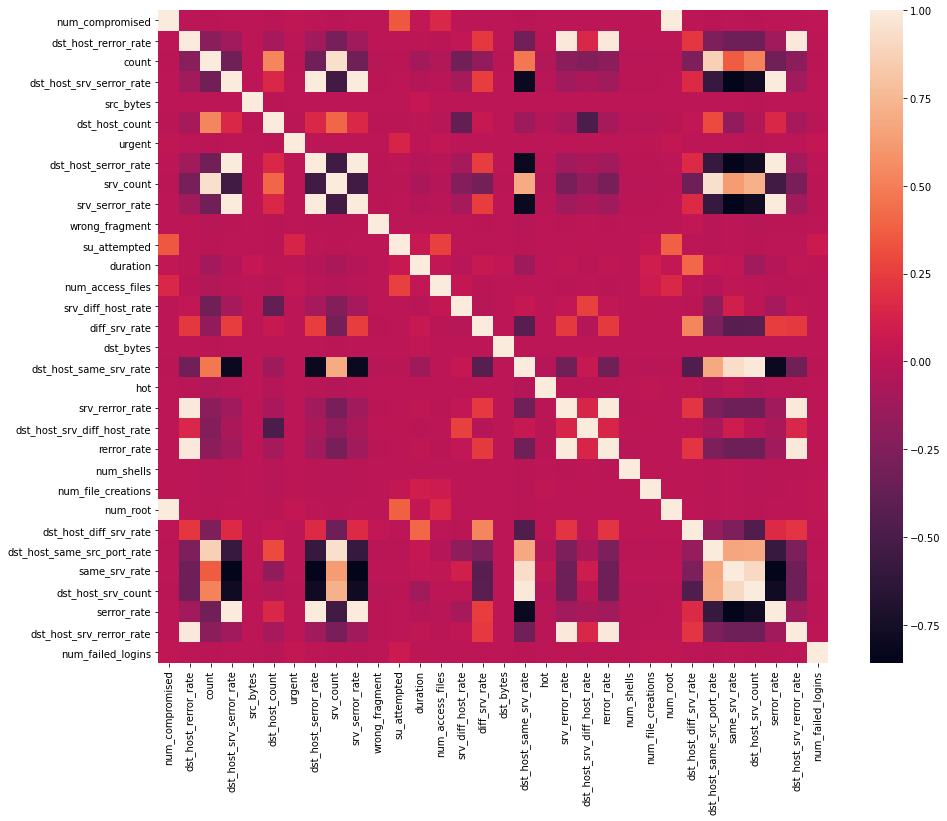

In [153]:
corr = df[numeric_features].corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [154]:
print("num_root vs num_compromised {}".format(df['num_root'].corr(df['num_compromised'])))
print("srv_serror_rate vs serror_rate{}".format(df['srv_serror_rate'].corr(df['serror_rate'])))
print("srv_count vs count {}".format(df['srv_count'].corr(df['count'])))
print("srv_rerror_rate vs rerror_rate {}".format(df['srv_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_same_srv_rate vs {} dst_host_srv_count".format(df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])))
print("dst_host_srv_serror_rate{} vs dst_host_serror_rate".format(df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])))
print("dst_host_srv_rerror_rate vs dst_host_rerror_rate{}".format(df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])))
print("dst_host_same_srv_rate vs same_srv_rate{}".format(df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])))
print("dst_host_srv_count vs same_srv_rate{}".format(df['dst_host_srv_count'].corr(df['same_srv_rate'])))
print("dst_host_same_src_port_rate vs srv_count{}".format(df['dst_host_same_src_port_rate'].corr(df['srv_count'])))
print("dst_host_serror_rate vs serror_rate {}".format(df['dst_host_serror_rate'].corr(df['serror_rate'])))
print("dst_host_serror_rate vs srv_serror_rate {}".format(df['dst_host_serror_rate'].corr(df['srv_serror_rate'])))
print("dst_host_srv_serror_rate vs serror_rate {}".format(df['dst_host_srv_serror_rate'].corr(df['serror_rate'])))
print("dst_host_srv_serror_rate vs {}".format(df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])))
print("dst_host_rerror_rate vs rerror_rate {}".format(df['dst_host_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_rerror_rate vs srv_rerror_rate {}".format(df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])))
print("dst_host_srv_rerror_rate vs rerror_rate{}".format(df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_srv_rerror_rate vs srv_rerror_rate {}".format(df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])))

num_root vs num_compromised 0.9975798933487737
srv_serror_rate vs serror_rate0.9986924138664222
srv_count vs count 0.9433902218808042
srv_rerror_rate vs rerror_rate 0.9953719458068703
dst_host_same_srv_rate vs 0.9788464524225914 dst_host_srv_count
dst_host_srv_serror_rate0.998285955975919 vs dst_host_serror_rate
dst_host_srv_rerror_rate vs dst_host_rerror_rate0.9869790678086942
dst_host_same_srv_rate vs same_srv_rate0.9316213679073936
dst_host_srv_count vs same_srv_rate0.9075289446662882
dst_host_same_src_port_rate vs srv_count0.9473596471554561
dst_host_serror_rate vs serror_rate 0.9990059376728406
dst_host_serror_rate vs srv_serror_rate 0.9979417182527545
dst_host_srv_serror_rate vs serror_rate 0.9982509415923287
dst_host_srv_serror_rate vs 0.9993917300385466
dst_host_rerror_rate vs rerror_rate 0.9897555886509829
dst_host_rerror_rate vs srv_rerror_rate 0.9855530624565976
dst_host_srv_rerror_rate vs rerror_rate0.9859781723139902
dst_host_srv_rerror_rate vs srv_rerror_rate 0.9879088754

In [155]:
# Based on the correlation, computation we will drop columns that are highly coorelated.
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [182]:
# df.iloc[0:1,:].transpose()

In [160]:
def binary_classifier(train_data):
#   Converting the labels as 0 (Normal) and 1 as (Attack)
    train_data['label'][train_data['label']!='normal.'] = 'attack'  # end with .
    train_data['label'][train_data['label']=='normal.'] = 0
    train_data['label'][train_data['label']=='attack'] = 1
    train_data[['label']] = train_data[['label']].apply(pd.to_numeric)
    return train_data

In [186]:
def multiclass_classifier(train_data):
    print("Multiclass Classifier")
    types = requests.get(kdd_attack_types)
    attack_dict = {}
    types_text_split = types.text.split()
    for idx in range(0, len(types_text_split)):
        if idx < len(types_text_split) -1:
            attack_dict[types_text_split[idx]] = types_text_split[idx+1]
    attack_dict['normal'] = 'normal'
    #   Some label values have . at the end, so just copying everything, except the last character
    train_data['label'] = train_data.label.apply(lambda x : attack_dict[x[0:-1]] )
    return train_data

In [187]:
df_binary = binary_classifier(df.copy(deep=True))
# df_binary.iloc[0:1,:].transpose()

<ipython-input-160-1079852dd6aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'][train_data['label']!='normal.'] = 'attack'  # end with .
<ipython-input-160-1079852dd6aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'][train_data['label']=='normal.'] = 0
<ipython-input-160-1079852dd6aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'][train_data['label']=='attack'] = 1


In [189]:
df_multi = multiclass_classifier(df.copy(deep=True))
# df_multi.iloc[0:1,:].transpose()
df_multi.head()

Multiclass Classifier


,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
0,0,1,215,45076,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal
1,0,1,162,4528,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal
2,0,1,236,1228,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal
3,0,1,233,2032,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal
4,0,1,239,486,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal


# Model Execution

In [164]:
# Array for storing classifier and scores
Classifier = []
Accuracy = []
Precision = []
Recall = []
F1score = []

In [173]:
def decision_trees(train_feature, train_label, test_feature, test_label):
    max_depth_value = list()
    accuracy_scores = list()
    precision_scores = list()
    recall_scores = list()
    f1_scores = list()
    highest_accuracy = 0

    # do decision tree with max_depth from 15-25
    for max_depth in range(15, 26):
        clf = tree.DecisionTreeClassifier(splitter = "random", criterion = "entropy", max_depth=max_depth)
        clf.fit(train_feature, train_label.values.ravel())
        prediction = clf.predict(test_feature)
        accuracy = accuracy_score(prediction, test_label)

        if (accuracy > highest_accuracy):
            highest_accuracy = accuracy
            prediction_result = prediction

        print("When the max depth is: ", max_depth)
        matrix = confusion_matrix(test_label, prediction)
        # print(matrix)
        precision = matrix[0][0]/(matrix[0][0]+matrix[1][0])
        recall = matrix[0][0]/(matrix[0][0]+matrix[0][1])
        f1score = (matrix[0][0]*2)/(matrix[0][0]*2+matrix[1][0]+matrix[0][1])
        print("The Decision Tree Accuracy is = ", accuracy*100, " %")
        print("The Decision Tree Precision is = ", precision)
        print("The Decision Tree Recall is = ", recall)
        print("The Decision Tree F1-score is = ", f1score)

        max_depth_value.append(max_depth)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1score)

# Binary Classifier

In [178]:
Y = df_binary['label']
X = df_binary.drop(['label'], axis=1)
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3281948, 30) (1616483, 30)
(3281948,) (1616483,)


In [190]:
decision_trees(X_train, Y_train, X_test, Y_test)

When the max depth is:  15
The Decision Tree Accuracy is =  99.97265668738861  %
The Decision Tree Precision is =  0.9991591902067458
The Decision Tree Recall is =  0.9994642095065431
The Decision Tree F1-score is =  0.9993116765814308
When the max depth is:  16
The Decision Tree Accuracy is =  99.9765540373762  %
The Decision Tree Precision is =  0.9990039902640049
The Decision Tree Recall is =  0.9998162114005003
The Decision Tree F1-score is =  0.9994099358091119
When the max depth is:  17
The Decision Tree Accuracy is =  99.98540040322106  %
The Decision Tree Precision is =  0.9995017206209806
The Decision Tree Recall is =  0.9997632553633563
The Decision Tree F1-score is =  0.9996324708857763
When the max depth is:  18
The Decision Tree Accuracy is =  99.9839775611621  %
The Decision Tree Precision is =  0.999430133778431
The Decision Tree Recall is =  0.9997632553633563
The Decision Tree F1-score is =  0.9995966668172028
When the max depth is:  19
The Decision Tree Accuracy is = 

# Multi-Class Classifier

In [192]:
Y = df_multi['label']
X = df_multi.drop(['label'], axis=1)
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3281948, 30) (1616483, 30)
(3281948,) (1616483,)


In [193]:
decision_trees(X_train, Y_train, X_test, Y_test)

When the max depth is:  15
The Decision Tree Accuracy is =  99.98391569846389  %
The Decision Tree Precision is =  0.9999914160209824
The Decision Tree Recall is =  0.9999719075258178
The Decision Tree F1-score is =  0.999981661678253
When the max depth is:  16
The Decision Tree Accuracy is =  99.97643031197977  %
The Decision Tree Precision is =  0.9999859536094542
The Decision Tree Recall is =  0.9999773698983753
The Decision Tree F1-score is =  0.9999816617354943
When the max depth is:  17
The Decision Tree Accuracy is =  99.98762746035683  %
The Decision Tree Precision is =  0.9999851733354143
The Decision Tree Recall is =  0.9999797109908684
The Decision Tree F1-score is =  0.9999824421556819
When the max depth is:  18
The Decision Tree Accuracy is =  99.98360638497282  %
The Decision Tree Precision is =  0.9999882947110823
The Decision Tree Recall is =  0.9999804913373734
The Decision Tree F1-score is =  0.9999843930090044
When the max depth is:  19
The Decision Tree Accuracy is 